In [4]:
from __future__ import print_function
import pandas as pd
import numpy as np
from feature import Feature
from model import XGB
from sklearn.metrics import f1_score
import numpy as np
from collections import defaultdict
import os
import matplotlib.pyplot as plt
%matplotlib inline
DATA = os.path.abspath('./data')

In [3]:
data = pd.read_csv('data/seg_Ax.txt', sep='\t', header=None, names=['seg_Ax'], encoding='utf-8', dtype=str)
data['seg_Bx'] = pd.read_csv('data/seg_Bx.txt', header=None, encoding='utf-8', dtype=str)
data['label'] = pd.read_csv('data/label.txt',header=None)

# 重新组织训练集，对于非相似语义句对，只保留较难判断的

In [113]:
def edit_distance2(row):
    
    def ed(s1,s2):
        m=len(s1)+1
        n=len(s2)+1
        i=None
        j=None
        tbl = {}
        for i in range(m): tbl[i,0]=i
        for j in range(n): tbl[0,j]=j
        for i in range(1, m):
            for j in range(1, n):
                cost = 0 if s1[i-1] == s2[j-1] else 1
                tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

        return tbl[i,j]
    
    return ed(''.join(row['seg_Ax'].split()),
              ''.join(row['seg_Bx'].split()))

In [114]:
train_edit_distance = data.apply(edit_distance2, axis=1, raw=True)
data['ed'] = train_edit_distance

In [145]:
print(len(data[data['label']==0]), len(data[data['label']==1]))

83792 18685


In [152]:
hard_np = data[data['ed']<=7][data['label']==0]
print(len(hard_np))

19111


/Users/marc/.pyenv/versions/2.7.15/envs/atec/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


# 保存数据集*_*xr.txt

In [178]:
data_p = data[data['label']==1]
data_r = pd.concat([data_p, hard_np])
data_r = data_r.sample(frac=1)

In [179]:
data_r.to_csv(os.path.join(DATA, 'seg_Axr.txt'),
              columns=['seg_Ax'],
              encoding='utf-8', index=None,
              header=None)
data_r.to_csv(os.path.join(DATA, 'seg_Bxr.txt'),
              columns=['seg_Bx'],
              encoding='utf-8', index=None,
              header=None)
data_r.to_csv(os.path.join(DATA, 'label_xr.txt'),
              columns=['label'],
              encoding='utf-8', index=None,
              header=None)

In [180]:
data_r

,seg_Ax,seg_Bx,label,ed
77570,我 想 借呗 行 吗,我 说 是 蚂蚁借呗,1,6
8190,为什么 我 不能 用 蚂蚁花呗,为什么 我 的 花呗 支付 不了,1,7
25198,借呗 可以 提前 还 部分 么,如何 按 月 提前 还款 借呗,0,7
69768,蚂蚁借呗 分期 能 不能 调,可是 我 的 借呗 现在 就 不能 调,0,7
31526,花呗 提前 还款 不 可以,花呗 可以 提前 还 么,1,6
65674,花呗 分期 是 下个月 开始 还 吗,花呗 什么 时候 开始 分期,1,8
95158,花呗 安全 验证 一直 不能 通过,花呗 安全 验证 失败 ， 怎样才能 验证 成功,1,10
93812,花呗 购物 送 流量 在 哪里找,花呗 赠送 的 流量 在 哪里 兑换,0,5
11127,在 借呗 借 了 * 元 ， 已经 还清 了 ， 为什么 借呗 显示 未 还,蚂蚁借呗 已经 还款 ， 还 提示 未 还清,1,16
57091,花呗 能花 多少,申请 花呗 信用 额要 多少,0,6


# 重新划分验证集

In [2]:
data = pd.read_csv('data/seg_Axr.txt', sep='\t', header=None, names=['seg_Ax'], encoding='utf-8', dtype=str)
data['seg_Bx'] = pd.read_csv('data/seg_Bxr.txt', header=None, encoding='utf-8', dtype=str)
data['label'] = pd.read_csv('data/label_xr.txt',header=None)

In [5]:
valid_index=data.sample(frac=0.2).index
np.save(os.path.join(DATA, 'valid_index_xr.npy'), valid_index)

In [14]:
data[(data['ed']==0) & (data['label']==1)]

,seg_Ax,seg_Bx,label,ed
386,网页 版 借呗 在 哪里,网页 版 借呗 在 哪里,1,0
4954,借呗 现金 红包,借呗 现金 红包,1,0
17401,【 花呗 】 你 的 支付宝 * @ qq . com 花呗 * 月 账单 自动 还款 失败...,【 花呗 】 你 的 支付宝 * @ qq . com 花呗 * 月 账单 自动 还款 失败...,1,0
80136,花呗 使用 范围,花呗 使用 范围,1,0
88671,花呗 交易 号 [ * ],花呗 交易 号 [ * ],1,0


In [28]:
data[(data['ed']>10) & (data['label']==1)]

,seg_Ax,seg_Bx,label,ed
0,怎么 更改 花呗 手机号码,我 的 花呗 是 以前 的 手机号码 ， 怎么 更 改成 现在 的 支付宝 的 号码 手机号,1,24
58,注销 了 一个 花呗 账号 ， 新 账号 是否 还 能 再 开通 花呗 了,把 以前 的 帐号 注销 ， 现在 这个 能 开通 花呗 吗,1,17
61,为何 蚂蚁借呗 不能 使用 了,我 的 借呗 * 年 能 有 * 年 怎么 不能 用 了,1,13
63,用 了 这么久 的 支付宝 也 不 给 开通 借呗 ， 哼,我用 支付宝 三四年 了 也 不见 给 我 开通 借呗,1,13
66,蚂蚁借呗 的 额度 为什么 会 下降,为什么 借呗 额度 被 降低 了 ， 没有 不良 记录,1,15
73,我 * 月份 花呗 消费 是 * 元 ， 怎么 要 我 还 * 元,我 原本 这个 月 总 的 花呗 需要 还 * 元 ， 我 还 了 一次 * ， 又 还 了...,1,49
99,花呗 支付 可以 使用 购物 津贴 吗,使用 购物 津贴 的 费用 可以 用 花呗 吗,1,13
101,为什么 每个 人 的 借呗 日息 不 一样,为什么 借呗 利息 有 的 高 有 的 底,1,11
117,花呗 交 的 电费 为什么 没有 到 账,我用 花呗 交 电费 ， 显示 缴费 成功 ， 但 没有 到 账 ， 怎么回事,1,17
132,花呗 退款 后 为什么 确认 收货 还是 原来 的 价钱,退款 花呗 后 为什么 金额 还是 不变,1,13


Text(0.5,0,'ed')

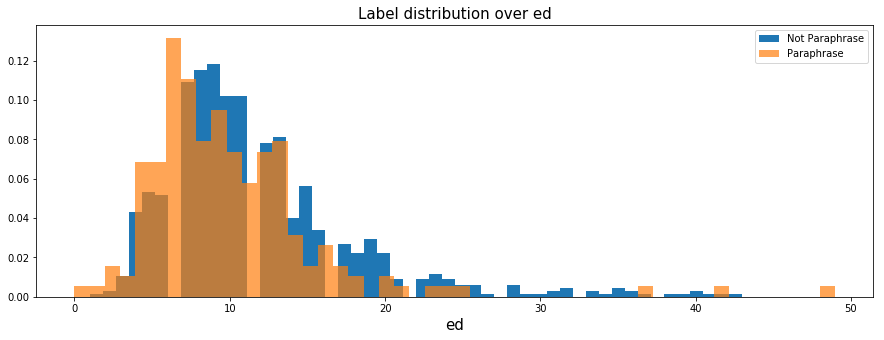

In [20]:
plt.figure(figsize=(15, 5))
plt.hist((data['ed'].iloc[:1000])[data['label'] == 0], bins=50, normed=True, label='Not Paraphrase')
plt.hist((data['ed'].iloc[:1000])[data['label'] == 1], bins=50, normed=True, alpha=0.7, label='Paraphrase')
plt.legend()
plt.title('Label distribution over ed', fontsize=15)
plt.xlabel('ed', fontsize=15)

In [24]:
data_p = data[data['label'] == 1]

In [39]:
class SeqDict(object):
    def __init__(self):
        self.dict = defaultdict(int)
        self.lst = []
    
    def add(self, seq):
        if seq not in self.dict.keys():
            self.dict[seq] = len(self.lst)
            self.lst.append(seq)
    
    def __getitem__(self, obj):
        if type(obj) == unicode:
            return self.dict[obj]
        else:
            return self.lst[obj]

In [40]:
seq_dict = SeqDict()
A = data_p['seg_Ax']
B = data_p['seg_Bx']
for seq in list(A):
    seq_dict.add(seq)
for seq in list(B):
    seq_dict.add(seq)

In [49]:
ids_A, ids_B = [], []
for s1, s2 in zip(A,B):
    if s1 != s2:
        ids_A.append(seq_dict[s1])
        ids_B.append(seq_dict[s2])

In [59]:
tri_cliques = set()
for id1_base, id2_base in zip(ids_A, ids_B):
    for id1, id2 in zip(ids_A, ids_B):
        combi = set([id1_base, id2_base, id1, id2])
        if len(combi) == 3:
            a = min(combi)
            b = max(combi)
            c = combi-set([a,b])
            combi_tuple = (a,b,c.pop())
            if combi_tuple not in tri_cliques:
                tri_cliques.add(combi_tuple)
                print(3)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [60]:
print(len(tri_cliques))

905


In [63]:
ids_cliques = set()
for combi_tuple in tri_cliques:
    for id in combi_tuple:
        ids_cliques.add(id)

In [138]:
print(len(ids_cliques))
# print(ids_cliques)

996


In [79]:
ids_cliques_lst = list(ids_cliques)
ids_cliques_dict = defaultdict(int)
for i, id_tc in enumerate(ids_cliques_lst):
    ids_cliques_dict[id_tc] = i

num = len(ids_cliques_lst)
graph = np.zeros((num, num))
for combi_tuple in tri_cliques:
    a, b, c = combi_tuple
    a_i, b_i, c_i = ids_cliques_dict[a], ids_cliques_dict[b], ids_cliques_dict[c]
    graph[a_i, b_i] = 1
    graph[a_i, c_i] = 1
    graph[b_i, c_i] = 1

In [89]:
to_one = np.frompyfunc(lambda x: int(x>0), 1, 1)

In [105]:
graph_closure = np.array(graph)
nhops = 0
while(True):
    nedges_before = graph_closure.sum()
    graph_closure = np.matmul(graph_closure, graph) + graph
    graph_closure = to_one(graph_closure).astype(np.int)
    nedges_after = graph_closure.sum()
    nhops += 1
    if nedges_before == nedges_after:
        print(nhops - 1)
        break

2


In [107]:
print(graph.sum(), graph_closure.sum())

1656.0 1878


In [133]:
new_lines = []
for i in range(num):
    for j in range(num):
        if graph_closure[i, j]>0:
            s1_id, s2_id = ids_cliques_lst[i], ids_cliques_lst[j]
            if (s1_id not in set(ids_A) or s2_id not in set(ids_B)) and \
            (s2_id not in set(ids_A) or s1_id not in set(ids_B)):
                new_lines.append((s1_id, s2_id))
            
#             s1, s2 = seq_dict[ids_cliques_lst[i]], seq_dict[ids_cliques_lst[j]]
            
#             if (s1 not in set(data['seg_Ax']) or s2 not in set(data['seg_Bx'])) and \
#             (s2 not in set(data['seg_Ax']) or s1 not in set(data['seg_Bx'])):
#                 new_lines.append((s1, s2))

In [134]:
print(len(new_lines))

549


In [137]:
for id1, id2 in new_lines:
    print(seq_dict[id1], '----', seq_dict[id2])

网商贷 ， 和 借呗 区别 ---- 网商贷 和 借呗 有 什么 分别
帮 我 开通 借呗 ---- 支付宝 怎么 开通 借呗
花呗 还款 时间 可以 延后 吗 ---- 花呗 可以 推迟 一天 还 嘛
蚂蚁借呗 利息 太高 如何 降低 ---- 蚂蚁借呗 利息 怎样 降低
干嘛 花呗 充值 话费 会 退款 ---- 为什么 我用 花呗 交 话费 ， 你们 要 给 我 退款
花呗 还是 开通 不了 ---- 花呗 还是 开通 不了
花呗 还是 开通 不了 ---- 如果 开通 花呗
我 的 花呗 额度 被 冻结 了 ， 怎么 才能 恢复 ---- 花呗 冻结 了 ， 怎样 能 解开
借呗 怎么 借 的 ---- 我 想 用 蚂蚁借呗 怎么办
一直 使用 花呗 ， 但是 额度 从未 提升 过 是 为什么 ---- 怎样 提升 花呗 额度
什么 时候 才能 开通 花呗 ---- 什么 时候 花呗 才能 开通
借呗 怎么样 关闭 自动 还款 ---- 借呗 不能取消 代扣
如何 自主 关闭 借呗 ---- 如何 关闭 借呗
如何 自主 关闭 借呗 ---- 可以 申请 现在 关闭 我 的 借呗 功能 吗
花呗 账单 可以 推迟 还款 吗 ---- 花呗 账单 可以 推迟 还款 吗
花呗 账单 可以 推迟 还款 吗 ---- 我 的 花呗 可以 晚 两天 还款 嘛
为什么 我 的 花呗 还 用 不了 ---- 为什么 我 的 花呗 还 用 不了
为什么 我 的 花呗 还 用 不了 ---- 不能 使用 花呗
为什么 我 的 花呗 还 用 不了 ---- 花呗 用 不了 了 … …
帮 我 转 人工 服务 ---- 有没有 人工 客服 电话
帮 我 转 人工 服务 ---- 转 人工 客服
帮 我 转 人工 服务 ---- 是 人工 客服 吗
帮 我 转 人工 服务 ---- 你 是 人工 客服 嘛
帮 我 转 人工 服务 ---- 有 人工 客服 么
帮 我 转 人工 服务 ---- 接 人工 服务
帮 我 转 人工 服务 ---- 有 人工 客服 电话 吗
帮 我 转 人工 服务 ---- 人工 服务 电话
帮 我 转 人工 服务 ---- 找 客服 人员
帮 我 转 人工 服务 ---- 你 是 人工 客服 吗
帮 我 转 人工 服务 ---- 人工 服务 有 吗
帮 